[-3.38987741]
[[-0.05674024  0.45998177]]


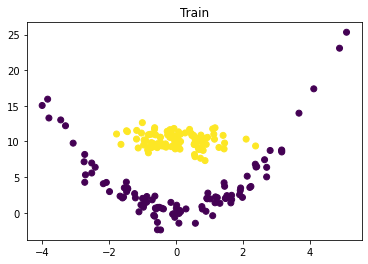

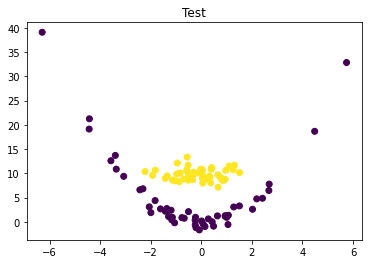

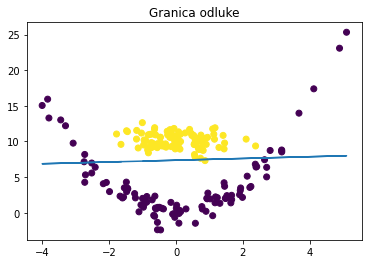

In [40]:
#Zadatak 1 i 2 i 3
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
train=generate_data(200)

np.random.seed(12)
test=generate_data(100)

plt.figure(1)
plt.title("Train")
plt.scatter(train[:,0], train[:,1], c=train[:,2])

plt.figure(2)
plt.title("Test")
plt.scatter(test[:,0], test[:,1], c=test[:,2])

model=lm.LogisticRegression()
model.fit(train[:,0:2], train[:,2])
theta0=model.intercept_
theta1=model.coef_

print(theta0)
print(theta1)

x2=(-theta0-theta1[0,0] * train[:,0]) / theta1[0,1] #granica odluke

plt.figure(3)
plt.title("Granica odluke")
plt.scatter(train[:,0], train[:,1], c=train[:,2])
plt.plot(train[:,0], x2)


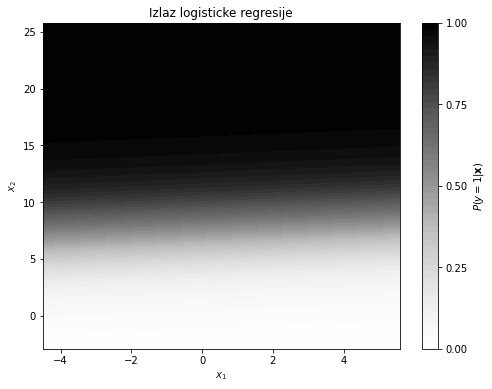

In [43]:
#Zadatak 4
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
data_train=generate_data(200)

np.random.seed(12)
data_test=generate_data(100)

LogRegModel=lm.LogisticRegression()
LogRegModel.fit(data_train[:,0:2], data_train[:,2])


f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(data_train[:,0])-0.5:max(data_train[:,0])+0.5:.05,
                          min(data_train[:,1])-0.5:max(data_train[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = LogRegModel.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
plt.show()


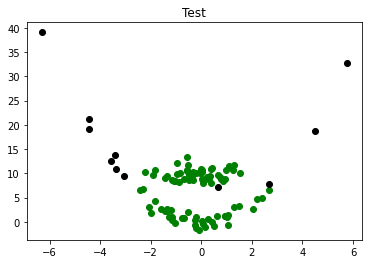

In [50]:
#Zadatak 5

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
data_train=generate_data(200)

np.random.seed(12)
data_test=generate_data(100)

LogRegModel=lm.LogisticRegression()
LogRegModel.fit(data_train[:,0:2], data_train[:,2])

prediction=LogRegModel.predict(data_test[:,0:2])

plt.figure(2)
plt.title("Test")
i=0
for point in data_test:
  if(point[2]==prediction[i]):
    plt.scatter(point[0], point[1], color='green')
  else:
    plt.scatter(point[0], point[1], color='black')
  i=i+1


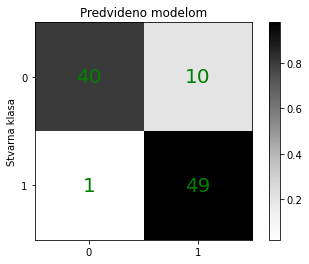

Accuracy: 0.89
Precision: 0.8305084745762712
Recall: 0.98
Specifity: 0.8


In [57]:
#Zadatak 6

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as metrics

def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()



np.random.seed(242)
data_train=generate_data(200)

np.random.seed(12)
data_test=generate_data(100)

LogRegModel=lm.LogisticRegression()
LogRegModel.fit(data_train[:,0:2], data_train[:,2])

prediction=LogRegModel.predict(data_test[:,0:2])

confusionMatrix=metrics.confusion_matrix(data_test[:,2], prediction)

plot_confusion_matrix(confusionMatrix)

accuracy=metrics.accuracy_score(data_test[:,2], prediction)
precision=metrics.precision_score(data_test[:,2], prediction)
recall=metrics.recall_score(data_test[:,2], prediction)
specifity=metrics.recall_score(data_test[:,2], prediction, pos_label=0)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("Specifity: " + str(specifity))

[-3.38987741]
[[-0.05674024  0.45998177]]


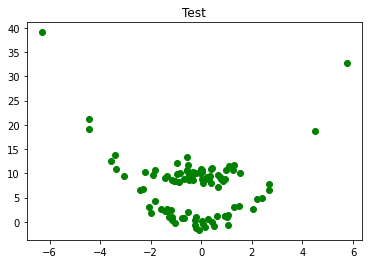

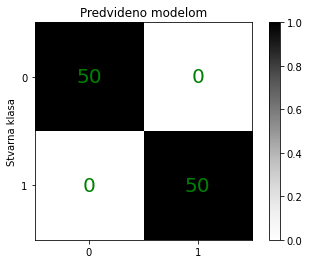

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specifity: 1.0


In [73]:
#Zadatak 7

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures



def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()


np.random.seed(242)
data_train=generate_data(200)

np.random.seed(12)
data_test=generate_data(100)


poly = PolynomialFeatures(degree=2, include_bias = False)
data_train_new = poly.fit_transform(data_train[:,0:2])
data_test_new = poly.fit_transform(data_test[:,0:2])
data_train_y=data_train[:,2]
data_test_y=data_test[:,2]


LogRegModel=lm.LogisticRegression()
LogRegModel.fit(data_train_new, data_train_y)

prediction=LogRegModel.predict(data_test_new)

theta0=model.intercept_
theta1=model.coef_

print(theta0)
print(theta1)

# x2=(-theta0-theta1[0,0] * train[:,0]) / theta1[0,1] #granica odluke

# plt.figure(1)
# plt.title("Granica odluke")
# plt.scatter(train[:,0], train[:,1], c=train[:,2])
# plt.plot(train[:,0], x2)

plt.figure(2)
plt.title("Test")
i=0
for point in data_test:
  if(point[2]==prediction[i]):
    plt.scatter(point[0], point[1], color='green')
  else:
    plt.scatter(point[0], point[1], color='black')
  i=i+1


confusionMatrix=metrics.confusion_matrix(data_test[:,2], prediction)

plot_confusion_matrix(confusionMatrix)

accuracy=metrics.accuracy_score(data_test[:,2], prediction)
precision=metrics.precision_score(data_test[:,2], prediction)
recall=metrics.recall_score(data_test[:,2], prediction)
specifity=metrics.recall_score(data_test[:,2], prediction, pos_label=0)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("Specifity: " + str(specifity))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specifity: 1.0


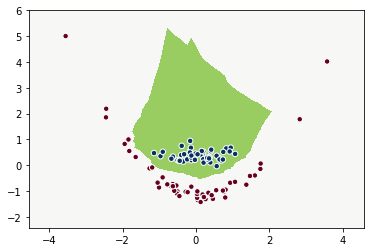

In [85]:
#Zadatak 8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

def plot_KNN(KNN_model, X, y):
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                         np.arange(x2_min, x2_max, 0.01))
         
    Z1 = KNN_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z1.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='PiYG', vmin = -2, vmax = 2)
    plt.scatter(X[:,0], X[:,1], c = y, s = 30, marker= 'o' , cmap='RdBu',  edgecolor='white', label = 'train')


def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1))); 
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

np.random.seed(242)
data_train=generate_data(200)

np.random.seed(12)
data_test=generate_data(100)

data_train[:,0:2]=preprocessing.scale(data_train[:,0:2])
data_test[:,0:2]=preprocessing.scale(data_test[:,0:2])

model=KNeighborsClassifier(5)
model.fit(data_train[:,0:2], data_train[:,2])

prediction=model.predict(data_test[:,0:2])

plot_KNN(model, data_test[:,0:2], prediction)

accuracy=metrics.accuracy_score(data_test[:,2], prediction)
precision=metrics.precision_score(data_test[:,2], prediction)
recall=metrics.recall_score(data_test[:,2], prediction)
specifity=metrics.recall_score(data_test[:,2], prediction, pos_label=0)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("Specifity: " + str(specifity))